# Exploratory Data Analysis

### Load and Preview the Data

In [82]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', 500)

In [19]:
relevant_cols = ['essay_id', 'essay_set', 'essay', 'domain1_score']
df = pd.read_excel('training_set_rel3.xlsx')[relevant_cols]
df.dropna(inplace=True)
df.head(3)

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the interne...",8.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using computers will benefit us in many ways like talking and becoming friends will others through websites like facebook and mysace. Using computers can help us find coordibates, locations, and able ourselfs to millions of information. Also computers will benefit us by helping with jobs as in planning a house plan and typing a @NUM1 page report for one of our jobs in less than writing it. Now lets go into the wonder world of technology. Using a computer wi...",9.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more people use computers, but not everyone agrees that this benefits society. Those who support advances in technology believe that computers have a positive effect on people. Others have different ideas. A great amount in the world today are using computers, some for work and spme for the fun of it. Computers is one of mans greatest accomplishments. Computers are helpful in so many ways, @CAPS4, news, and live streams. Don't get me wrong way to much peop...",7.0


In [3]:
df.describe()

,essay_id,essay_set,domain1_score
count,12977.000000,12977.000000,12977.000000
mean,10295.414426,4.179471,6.799723
std,6308.831351,2.136831,8.970558
min,1.000000,1.000000,0.000000
25%,4439.000000,2.000000,2.000000
50%,10045.000000,4.000000,3.000000
75%,15681.000000,6.000000,8.000000
max,21633.000000,8.000000,60.000000


In [4]:
df.nunique()

essay_id         12977
essay_set            8
essay            12973
domain1_score       53
dtype: int64

In [5]:
df.isna().sum()

essay_id         0
essay_set        0
essay            0
domain1_score    0
dtype: int64

In [9]:
continuous = df.columns[df.dtypes != object]

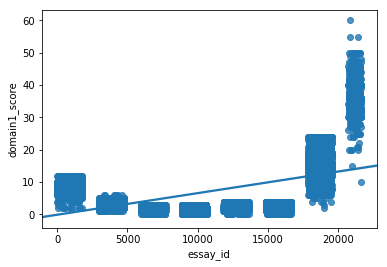

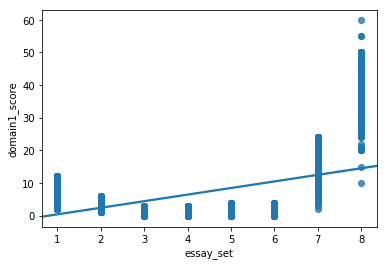

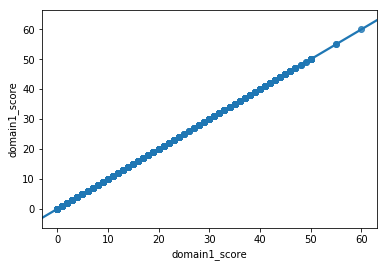

In [11]:
for col in continuous:
    sns.regplot(x=col, y='domain1_score', data=df)
    plt.show()

The definitions of these fields are as follows:

 - essay_id: A unique identifier for each individual student essay
 - essay_set: 1-8, an id for each set of essays
 - essay: The ascii text of a student's response
 - domain1_score: Resolved score between the raters; all essays have this
 
More information about this data is located at: https://www.kaggle.com/c/asap-aes/data

## Descriptive Statistics

### 1. Count of Essays by Set

In [9]:
print('Number of essays by essay set:')
print(df.groupby('essay_set')['essay_set'].count())
print(f'\nTotal # of essays: {df.shape[0]:,}')

Number of essays by essay set:
essay_set
1    1783
2    1800
3    1726
4    1771
5    1805
6    1800
7    1569
8     723
Name: essay_set, dtype: int64

Total # of essays: 12,977


Each essay set has roughly 1,800 essays except for essay set 8 which only has 723 essays. 

### 2. Document Length by Essay Set

In [10]:
print('\nDescriptive statistics: document length by essay set:')

df['essay_len'] = df['essay'].apply(len)
essay_len = df.groupby('essay_set')['essay_len'].describe()[['mean', 'std', '50%', 'max', 'min']]
essay_len.columns = ['mean', 'std', 'median', 'max', 'min']
display(essay_len.apply(lambda x: round(x, 1))[['mean', 'median', 'std', 'max', 'min']])


Descriptive statistics: document length by essay set:


,mean,median,std,max,min
essay_set,,,,,
1,2029.4,2018.0,690.6,4616.0,47.0
2,2097.0,2018.5,870.2,6098.0,160.0
3,587.2,539.0,295.3,2167.0,41.0
4,509.9,462.0,286.0,1965.0,8.0
5,685.5,661.0,338.9,2608.0,19.0
6,892.5,895.5,331.5,2718.0,19.0
7,844.6,769.0,446.5,3255.0,23.0
8,3180.9,3298.0,1082.2,5073.0,21.0


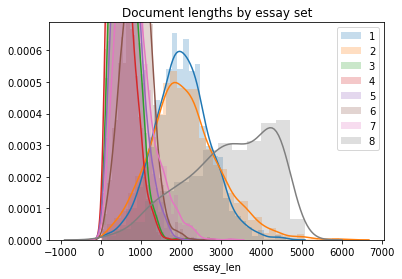

In [11]:
for i in range(1, 9):
    mask = df.essay_set == i
    sns.distplot(df[mask].essay_len, 
                 label=str(i), 
                 hist_kws = {'alpha':.25})


plt.legend()
plt.title('Document lengths by essay set')
plt.show()

We can see that the different essay sets have different mean lengths. 

### 4. Score by Essay Set

In [12]:
essay_score = df.groupby('essay_set')['domain1_score'].describe()[['mean', 'std', '50%', 'min', 'max']]
essay_score.columns = ['mean', 'std', 'median', 'min', 'max']
print('\nDescriptive statistics: essay score distribution essay set:')
display(essay_score.apply(lambda x: round(x, 1))[['mean', 'median', 'min', 'max','std']])


Descriptive statistics: essay score distribution essay set:


,mean,median,min,max,std
essay_set,,,,,
1,8.5,8.0,2.0,12.0,1.5
2,3.4,3.0,1.0,6.0,0.8
3,1.8,2.0,0.0,3.0,0.8
4,1.4,1.0,0.0,3.0,0.9
5,2.4,2.0,0.0,4.0,1.0
6,2.7,3.0,0.0,4.0,1.0
7,16.1,16.0,2.0,24.0,4.6
8,37.0,37.0,10.0,60.0,5.8


We can see that different essay sets are graded on different scales.  **This means we should consider normalizing all the scores to the same scale before attempting to build a predictive model**.

### 5. Relationship Between Document Length and Score

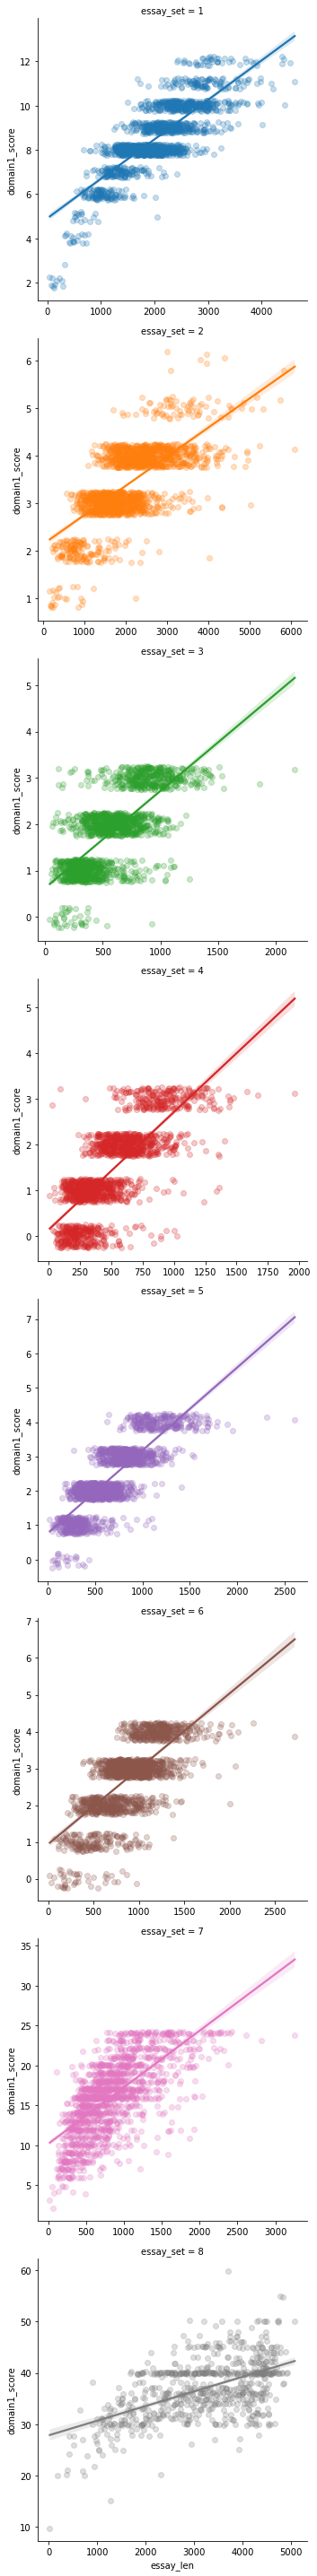

In [11]:
sns.lmplot(x='essay_len', 
           y='domain1_score', 
           row='essay_set',
           hue='essay_set',
           data=df, 
           sharey=False,
           sharex=False,
           y_jitter=.25,
           robust=True,
           truncate=True,
           scatter_kws={'alpha':.25})
plt.show()

**Observations**:  There seems to be a correlation between essay length and score for each different essay set.

### 6. Distribution of Essay Scores

To better compare all essay scores , I will normalize all the scores by subtracting the mean and dividing by the standard deviation.  

In [13]:
tempdf = df.join(essay_score, on='essay_set')
tempdf['normalized_score'] = (tempdf.domain1_score - tempdf['mean']) / tempdf['std']
normalized_score_df = tempdf[~tempdf.normalized_score.isna()].copy()

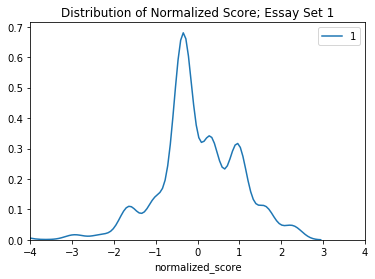

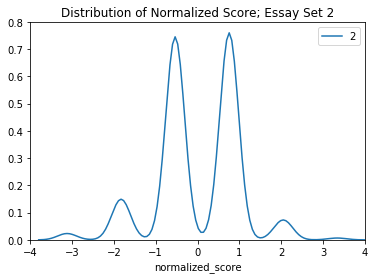

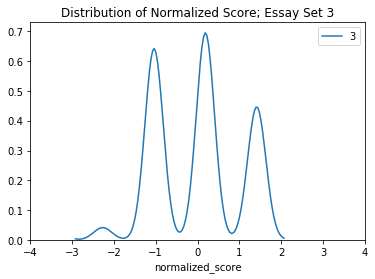

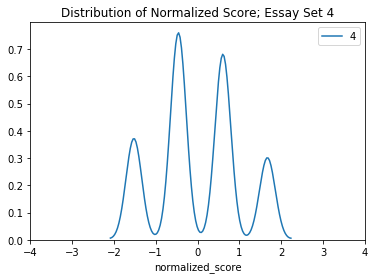

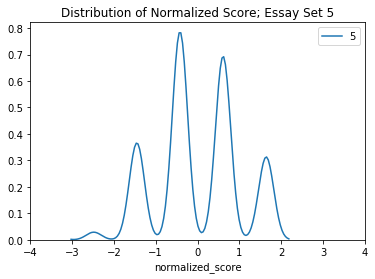

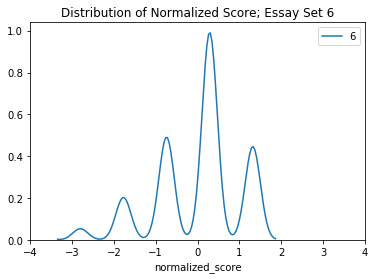

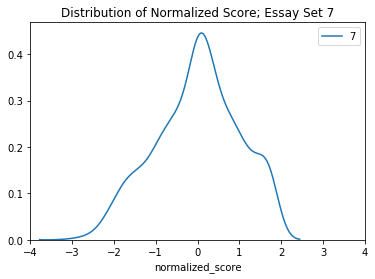

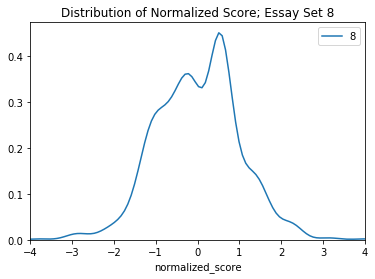

In [9]:
for i in range(1, 9):
    mask = normalized_score_df.essay_set == i
    sns.distplot(normalized_score_df[mask].normalized_score, 
                 label=str(i), 
                 #hist_kws = {'alpha':.01},
                 hist=False, 
                 norm_hist=True)


    #plt.legend()
    plt.xlim(-4, 4)
    plt.title(f'Distribution of Normalized Score; Essay Set {i}')
    plt.show()

Observations: **Not only are essays in different sets graded on different scales, but the scores are distributed quite differently.  For example, essay set 7 has a normal distribution while essay set 2 has a bi-normal distribution** This means when we model this data it may be important to introduce a latent variable that can learn to represent the distributions for each essay set.

## 7. Tokens Related to Essay Scores

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=25, stop_words="english"),
                     ElasticNetCV(l1_ratio = [.1], cv=3))

In [216]:
text_train = normalized_score_df.essay.values
y_train = normalized_score_df.normalized_score.values

In [218]:
#pipe.fit(text_train, y_train)

In [13]:
from sklearn.externals import joblib
joblib.dump(pipe, 'eda_model.pkl')

['eda_model.pkl']

In [219]:
from sklearn.externals import joblib
clf = joblib.load('eda_model.pkl') 

In [220]:
import numpy as np
vectorizer = clf.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)
# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
    feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
    feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['clicking' 'percent4' 'contagious' 'hysterically' 'recently' 'released'
 'hiding' 'jog' 'joined' 'virtual' 'scientist' 'abhor' 'forcing'
 'percent3' 'pointed' 'joking' 'urge' 'answered' 'shock' 'genres']
Features with highest tfidf: 
['scenery' 'check' 'party' 'caps4' 'caps8' 'plants' 'shape' 'profanity'
 'hill' 'means' 'trust' 'caps15' 'patient' 'caps11' 'person2' 'grandpa'
 'image' 'patience' 'little' 'lot']


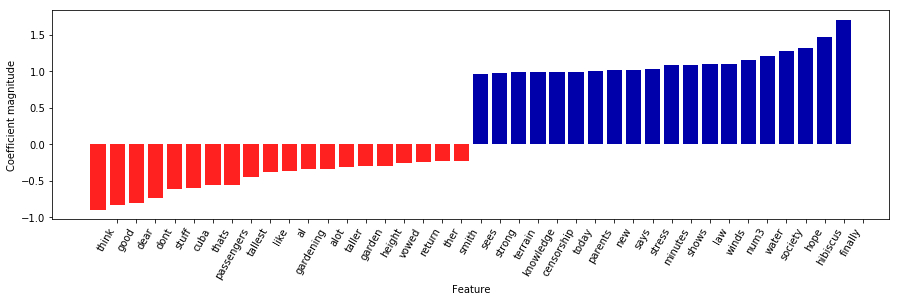

In [221]:
import mglearn
mglearn.tools.visualize_coefficients(
    clf.named_steps["elasticnetcv"].coef_,
    feature_names, n_top_features=20)

In [22]:
non_zero_coeffs = np.sum(clf.named_steps["elasticnetcv"].coef_ != 0) 
num_vars = len(clf.named_steps["elasticnetcv"].coef_)
print(f'{(non_zero_coeffs/num_vars)*100:.1f}% of {num_vars:,} of coefficients ({non_zero_coeffs}) are non-zero')

23.6% of 3,385 of coefficients (800) are non-zero


**Observations**: we can see that certain words like `think` are associated with low scores, whereas words like `finally` are associated with high scores.  I do not intuitively understand why these words are asociates with higher or lower scores.  

## 8. Calculating readability metrics

Using https://github.com/shivam5992/textstat

In [14]:
from textstat.textstat import textstatistics
ts = textstatistics()

In [15]:
normalized_score_df['rs_fk_grade'] = normalized_score_df.essay.apply(ts.flesch_kincaid_grade)
normalized_score_df['rs_fk_ease'] = normalized_score_df.essay.apply(ts.flesch_reading_ease)
normalized_score_df['rs_ari'] = normalized_score_df.essay.apply(ts.automated_readability_index)
normalized_score_df['rs_cli'] = normalized_score_df.essay.apply(ts.coleman_liau_index)
normalized_score_df['rs_dcrs'] = normalized_score_df.essay.apply(ts.dale_chall_readability_score)
normalized_score_df['rs_combined'] = normalized_score_df.essay.apply(ts.text_standard)

In [16]:
readability_metrics = ['rs_fk_grade', 'rs_fk_ease', 'rs_ari', 'rs_cli', 'rs_dcrs']
readibility_features = normalized_score_df[readability_metrics].values

In [28]:
enet = ElasticNetCV(normalize=True, cv = 10, l1_ratio=[.1, .5, .7, .9, .95, .99, 1],  max_iter=10000, n_jobs=-1)

In [29]:
enet.fit(readibility_features, normalized_score_df.normalized_score.values)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=10000,
       n_alphas=100, n_jobs=1, normalize=True, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [30]:
coeff_df = pd.DataFrame({'name':readability_metrics, 'coeff':enet.coef_})

/Users/hamelsmu/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


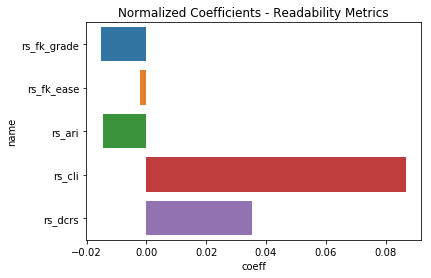

In [62]:
sns.barplot(x="coeff", y="name", data=coeff_df)
plt.title('Normalized Coefficients - Readability Metrics')
plt.show()

**Observations**: the coefficients for these metrics make sense, except for the metrics `rs_fk_grade` and `rs_ari` which both attempt to measure the grade level of the student.  It is interesting that the grade level is inversely correlated with the target variable (score).  In the following section, I will analyize the statistical correlation between each of these variables and the essay score.

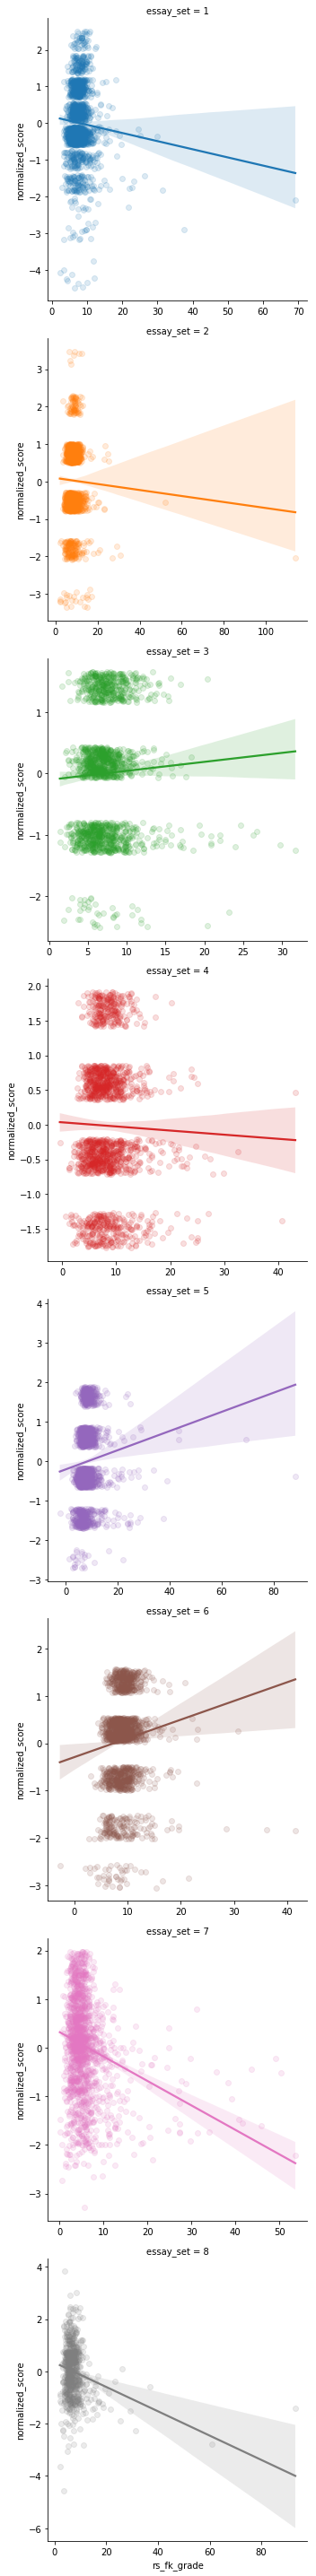

In [37]:
sns.lmplot(x='rs_fk_grade', 
               y='normalized_score', 
               row='essay_set',
               hue='essay_set',
               data=normalized_score_df, 
               robust=True,
               truncate=True,
               sharey=False,
               sharex=False,
               y_jitter=.25,
               scatter_kws={'alpha':.15})
plt.show()

## 9. Statistical Analysis On Readability Metrics vs. Score

In [61]:
for i, name in enumerate(readability_metrics):
    print(f'\n=======================\nResults for {name}:\n')
    lm = sm.RLM(normalized_score_df.normalized_score.values, readibility_features[:,i])
    res = lm.fit()
    print(res.summary())


Results for rs_fk_grade:

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                12977
Model:                            RLM   Df Residuals:                    12976
Method:                          IRLS   Df Model:                            0
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 12 Mar 2018                                         
Time:                        18:13:05                                         
No. Iterations:                    19                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0003    

**Observations**:  The grade level statistics do not have a statistically significant correlation with essay score, whereas the readability statistics `rs_cli` and `rs_dcrs` do.  This is important to keep in mind when building models to predict essay score.  It might be possible that the other metrics might have meaningful interactions with other variables, however the above results present a bias towards throwing these variables out.

## 10. Baseline Model

Leveraging sklearn pipeline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [43]:
#normalized_score_df.to_pickle('normalized_score_df.pkl')
normalized_score_df = pd.read_pickle('normalized_score_df.pkl')

In [44]:
df = normalized_score_df.rename({'essay_set': 'cat_essay_set'}, axis='columns')
df['cat_essay_set'] = df['cat_essay_set'].astype('category')

In [45]:
df.head()

,essay_id,cat_essay_set,essay,domain1_score,essay_len,mean,std,median,min,max,normalized_score,rs_fk_grade,rs_fk_ease,rs_ari,rs_cli,rs_dcrs,rs_combined
0,1,1,"Dear local newspaper, I think effects computer...",8.0,1875,8.528323,1.538565,8.0,2.0,12.0,-0.343387,8.5,74.02,11.3,9.46,6.53,6th and 7th grade
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0,2288,8.528323,1.538565,8.0,2.0,12.0,0.306569,9.1,67.08,10.1,8.59,7.05,8th and 9th grade
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0,1541,8.528323,1.538565,8.0,2.0,12.0,-0.993343,8.7,68.20,9.9,8.99,7.28,8th and 9th grade
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0,3165,8.528323,1.538565,8.0,2.0,12.0,0.956526,9.7,60.24,12.0,11.95,7.97,11th and 12th grade
4,5,1,"Dear @LOCATION1, I know having computers has a...",8.0,2569,8.528323,1.538565,8.0,2.0,12.0,-0.343387,7.0,72.66,7.7,8.70,6.48,6th and 7th grade


In [46]:
# this is the embedding df from the universal sentence encoder
emb_df = pd.read_pickle('combined_emb_df.pkl')

In [47]:
df = df.set_index('essay_id').join(emb_df)

In [48]:
train_df, test_df = train_test_split(df, 
                                     test_size=.15, 
                                     stratify=df.cat_essay_set)

In [49]:
print('Count of essays for training data by essay set:')
display(train_df.groupby('cat_essay_set').count()['essay'])

print('\n\nCount of essays for test data by essay set:')
display(test_df.groupby('cat_essay_set').count()['essay'])

Count of essays for training data by essay set:


cat_essay_set
1    1515
2    1530
3    1467
4    1505
5    1534
6    1530
7    1334
8     615
Name: essay, dtype: int64



Count of essays for test data by essay set:


cat_essay_set
1    268
2    270
3    259
4    266
5    271
6    270
7    235
8    108
Name: essay, dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

In [51]:
emb_cols = [x for x in df.columns if 'mean_emb_' in x or 'max_emb_' in x or 'essay_emb_' in x]

In [53]:
non_essay_feats = ['essay_len', 'rs_fk_grade','rs_fk_ease', 'rs_ari', 'rs_cli', 'rs_dcrs'] + emb_cols
mapper = DataFrameMapper([
    ('normalized_score', None),
    ('essay', TfidfVectorizer(min_df=10, stop_words="english")),
    ('cat_essay_set', None),
    (non_essay_feats, StandardScaler()),  
], df_out=True)

In [54]:
train_df_transformed = mapper.fit_transform(train_df)
train_df_transformed.columns = train_df_transformed.columns[:-len(non_essay_feats)].tolist() + non_essay_feats

In [55]:
test_df_transformed = mapper.transform(test_df)
test_df_transformed.columns = test_df_transformed.columns[:-len(non_essay_feats)].tolist() + non_essay_feats

In [56]:
train_df_transformed.head()

,normalized_score,essay_102,essay_11,essay_12,essay_1929,essay_1930,essay_1930s,essay_1937,essay_1956,essay_1961,...,mean_emb_502,mean_emb_503,mean_emb_504,mean_emb_505,mean_emb_506,mean_emb_507,mean_emb_508,mean_emb_509,mean_emb_510,mean_emb_511
essay_id,,,,,,,,,,,,,,,,,,,,,
14946,0.288472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.483811,-1.131319,-0.226125,1.026348,0.438684,-0.512004,-1.002105,-1.382148,0.327530,-0.785666
3602,-0.536538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.326903,-0.810691,-1.579860,-0.140955,-1.041911,1.704047,-1.220335,-0.139329,1.304736,-0.860740
21174,0.877690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.223045,0.492728,1.425721,0.325345,0.331554,-1.924240,0.971417,-0.011696,-0.642056,1.934741
21377,-0.512767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.344381,0.081287,0.774947,0.406729,1.137867,-1.726911,-1.137767,-0.110712,0.242758,1.240798
3908,2.045732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.264840,-0.389282,-1.258271,0.083052,-0.850500,-0.212180,0.143887,0.478429,-0.246903,0.100834


#### Use AutoML To See Baselines

In [57]:
%load_ext autoreload
%autoreload 2
import h2o
from h2o.automl import H2OAutoML
h2o.init(url='http://169.230.106.251:54323/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Checking whether there is an H2O instance running at http://169.230.106.251:54323. connected.


H2O cluster uptime:,17 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.5
H2O cluster version age:,10 days
H2O cluster name:,hamelsmu
H2O cluster total nodes:,1
H2O cluster free memory:,3.542 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [58]:
train_hf = h2o.H2OFrame(train_df_transformed)
train_hf['cat_essay_set'] = train_hf['cat_essay_set'].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [59]:
test_hf = h2o.H2OFrame(test_df_transformed)
test_hf['cat_essay_set'] = test_hf['cat_essay_set'].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [115]:
x = train_hf.columns[1:]
y = train_hf.columns[0]

In [116]:
aml = H2OAutoML(project_name = 'gtech_essays', 
                max_runtime_secs=600, 
                exclude_algos = ['DeepLearning', 'StackedEnsemble'], 
                stopping_metric = 'RMSE',
                stopping_tolerance=.01,
                stopping_rounds=2)

aml.train(x = x, y = y,
          training_frame = train_hf,
          leaderboard_frame = test_hf, 
          )

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


the new results with the universal embeddings

In [ ]:
aml.leaderboard[['model_id', 'rmse']]

The old results without the sent embeddings:

In [28]:
#aml.leaderboard[['model_id', 'rmse']]

model_id,rmse
DRF_0_AutoML_20180313_181623,0.614293
DRF_0_AutoML_20180313_183535,0.628137
XRT_0_AutoML_20180313_183535,0.675944


Observations:  H2o.ai Tried 3 different versions of Random Forest for this problem with the best one achieving RMSE of 0.61

In [117]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np
set_means = train_df_transformed.groupby('cat_essay_set')['normalized_score'].mean()
naive_scores = train_df[['cat_essay_set', 'normalized_score']].join(set_means, on='cat_essay_set', rsuffix='_avg')

In [118]:
best_model = aml.leader

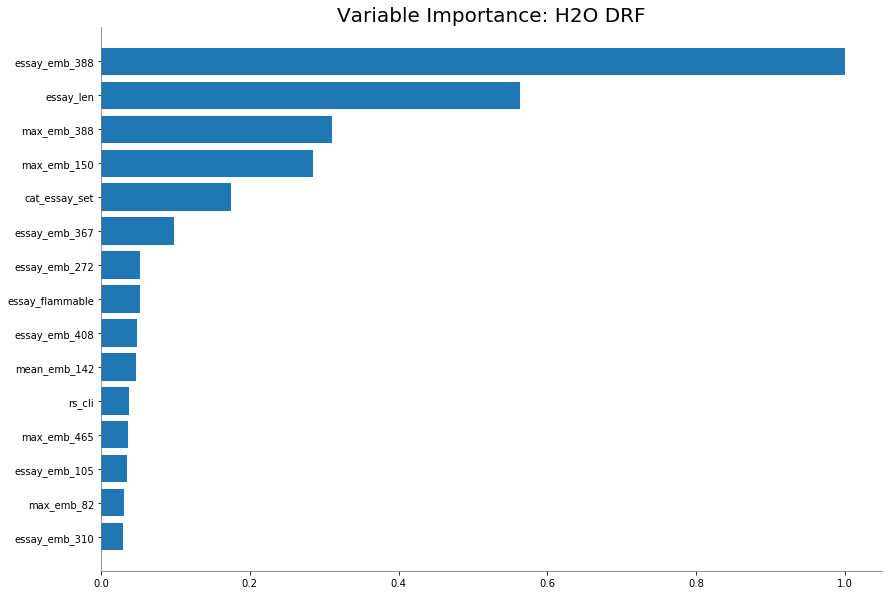

In [121]:
best_model.varimp_plot(15)

In [61]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [96]:
glm_model = H2OGeneralizedLinearEstimator(family= "gaussian", lambda_search=True, custom_metric_func='rmse', nfolds=10)
glm_model.train(x = x, 
                y = y,
                training_frame = train_hf,
                validation_frame = test_hf)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [97]:
glm_rmse = glm_model.rmse(valid=True)

## Automated Machine Learning With DataRobot

In [33]:
dr_train, dr_valid = train_test_split(train_df, train_size = .8, test_size=.2)
dr_test = test_df.copy()

In [34]:
dr_train = dr_train.assign(part='train')
dr_valid = dr_valid.assign(part='valid')
dr_test = dr_test.assign(part='test')
dr_all = pd.concat([dr_train, dr_valid, dr_test])

In [35]:
dr_all.groupby('part')['part'].count()

part
test     1947
train    8824
valid    2206
Name: part, dtype: int64

In [36]:
dr_all.drop(columns=['domain1_score', 'mean', 'std', 'median', 'min', 'max'], inplace=True)

In [54]:
import datarobot as dr

#you have to replace the below with your own token / endopoint
dr.Client(token='your-token-here', endpoint='https://app.datarobot.com/api/v2')

custom_partition = dr.UserTVH(user_partition_col='part', 
                              training_level='train', 
                              validation_level='valid', 
                              holdout_level='test')

project = dr.Project.create(dr_all,
                            project_name='Ed-Tech-Essay-WithEmb')

project.set_target(target='normalized_score',
                   metric='RMSE',
                   partitioning_method = custom_partition,
                   mode=dr.AUTOPILOT_MODE.QUICK, 
                   worker_count=30)

Project(Ed-Tech-Essay-WithEmb)

In [68]:
def get_leaderboard_dataframe(project_object, desired_metric=None):
    """Returns a dataframe of a projects models and model attributes.
    Metric fieldnames are specified as exampled for AUC for validation partition
    as 'metrics_AUC_validation'"""
    if desired_metric is None:
        desired_metric = project.metric
    models_rows = []
    for model in project_object.get_models():
        values = {}
        for k, v in model.__dict__.items():
            if k == 'metrics':
                for metric, partition_values in v.items():
                    if metric == desired_metric:
                        for partition, value in partition_values.items():
                            values['metrics_{:}_{:}'.format(metric, partition)] = value
            else:
                values[k] = v
        models_rows.append(values)
    return pd.DataFrame(models_rows)

In [67]:
import datarobot as dr
project = dr.Project.get(project_id='5ac9ceaada80e34242fe3ca4')

In [69]:
auto_ml_results = get_leaderboard_dataframe(project, desired_metric='RMSE')

In [72]:
def flatten(x):
    return ' ,'.join(x)

In [73]:
info = [ 'model_type', 'processes', 'metrics_RMSE_holdout', 'metrics_RMSE_validation', '_featurelist']

# New Results After Adding Sentence Embeddings

In [109]:
project = dr.Project.get(project_id='5ac9ceaada80e34242fe3ca4')
auto_ml_results = get_leaderboard_dataframe(project, desired_metric='RMSE')
auto_ml_results_filtered = auto_ml_results.query('sample_pct == 67.99723')[info]
auto_ml_results_filtered['processes'] = auto_ml_results_filtered.processes.apply(flatten)
new_results = auto_ml_results_filtered.copy()

In [110]:
def rename_feature_list(str_name):
    if str_name == 'Informative Features':
        return 'Yes' 
    elif str_name == 'no_emb':
        return 'No'

In [111]:
new_results._featurelist=new_results._featurelist.apply(lambda x: rename_feature_list(x.name))

In [112]:
final_results = new_results.rename(columns={'model_type':'Model',
                   'processes': 'Pre-processing Steps',
                   'metrics_RMSE_holdout': 'RMSE',
                   '_featurelist':'Emb:Y/N'}).drop(['metrics_RMSE_validation'], axis=1)
final_results

,Model,Pre-processing Steps,RMSE,Emb:Y/N
0,Light Gradient Boosted Trees Regressor with Early Stopping,"Ordinal encoding of categorical variables ,Missing Values Imputed ,Converter for Text Mining ,Auto-Tuned Word N-Gram Text Modeler using token occurrences ,Light Gradient Boosted Trees Regressor with Early Stopping",0.60307,Yes
1,eXtreme Gradient Boosted Trees Regressor with Early Stopping,"Ordinal encoding of categorical variables ,Missing Values Imputed ,Converter for Text Mining ,Auto-Tuned Word N-Gram Text Modeler using token occurrences ,eXtreme Gradient Boosted Trees Regressor with Early Stopping",0.60443,Yes
2,RandomForest Regressor,"Ordinal encoding of categorical variables ,Missing Values Imputed ,Converter for Text Mining ,Auto-Tuned Word N-Gram Text Modeler using token occurrences ,RandomForest Regressor",0.61188,Yes
3,RandomForest Regressor,"Ordinal encoding of categorical variables ,Missing Values Imputed ,Converter for Text Mining ,Auto-Tuned Word N-Gram Text Modeler using token occurrences ,RandomForest Regressor",0.62768,No
4,TensorFlow Neural Network Regressor,"One-Hot Encoding ,Missing Values Imputed ,Standardize ,Converter for Text Mining ,Auto-Tuned Word N-Gram Text Modeler using token occurrences ,TensorFlow Neural Network Regressor",0.61735,Yes
8,Nystroem Kernel SVM Regressor,"One-Hot Encoding ,Missing Values Imputed ,Standardize ,Smooth Ridit Transform ,Converter for Text Mining ,Auto-Tuned Word N-Gram Text Modeler using token occurrences ,Nystroem Kernel SVM Regressor",0.63268,No
9,Generalized Additive2 Model,"Ordinal encoding of categorical variables ,Missing Values Imputed ,Matrix of word-grams occurrences ,Generalized Additive2 Model ,Text fit on Residuals (L2 / Least-Squares Loss)",0.62015,Yes
10,Light Gradient Boosted Trees Regressor with Early Stopping,"Ordinal encoding of categorical variables ,Missing Values Imputed ,Converter for Text Mining ,Auto-Tuned Word N-Gram Text Modeler using token occurrences ,Light Gradient Boosted Trees Regressor with Early Stopping",0.63595,No
11,Nystroem Kernel SVM Regressor,"One-Hot Encoding ,Missing Values Imputed ,Standardize ,Smooth Ridit Transform ,Converter for Text Mining ,Auto-Tuned Word N-Gram Text Modeler using token occurrences ,Nystroem Kernel SVM Regressor",0.63088,Yes
12,Generalized Additive2 Model,"Ordinal encoding of categorical variables ,Missing Values Imputed ,Matrix of word-grams occurrences ,Generalized Additive2 Model ,Text fit on Residuals (L2 / Least-Squares Loss)",0.63730,No


### Visualization Of Results

In [113]:
import seaborn as sns

/Users/hamelsmu/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


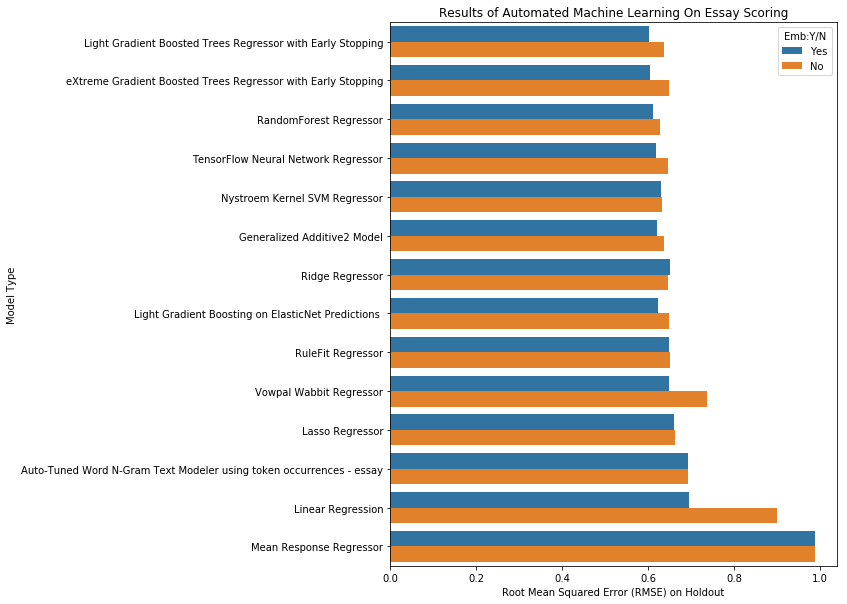

In [114]:
plt.figure(figsize=(8, 10))
sns.barplot(x='RMSE', y='Model', hue='Emb:Y/N', data=final_results)
plt.title('Results of Automated Machine Learning On Essay Scoring')
plt.xlabel('Root Mean Squared Error (RMSE) on Holdout')
plt.ylabel('Model Type')
plt.show()